In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score,recall_score,precision_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from keras import optimizers
print("all set")

all set


In [ ]:
dataset=pd.read_csv("/content/final_dataset_propagation.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                51000 non-null  int64  
 1   isConversationControlled  51000 non-null  int64  
 2   isPinned                  51000 non-null  int64  
 3   isQuote                   51000 non-null  int64  
 4   isReply                   51000 non-null  int64  
 5   isRetweet                 51000 non-null  int64  
 6   lang                      51000 non-null  int64  
 7   likeCount                 51000 non-null  float64
 8   media/0                   51000 non-null  int64  
 9   media/1                   51000 non-null  int64  
 10  possiblySensitive         51000 non-null  int64  
 11  replyCount                51000 non-null  float64
 12  quoteCount                51000 non-null  float64
 13  retweetCount              51000 non-null  float64
 14  source

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
x.head()

,Unnamed: 0,isConversationControlled,isPinned,isQuote,isReply,isRetweet,lang,likeCount,media/0,media/1,possiblySensitive,replyCount,quoteCount,retweetCount,source,type,viewCount
0,0,0,0,0,0,0,16,691.0,1,1,0,132.0,10.0,273.0,16,1,10952.0
1,1,0,0,0,0,0,16,843.0,1,1,0,47.0,10.0,441.0,16,1,21661.0
2,2,0,0,0,0,0,16,1275.0,1,1,0,284.0,18.0,584.0,16,1,33611.0
3,3,0,0,0,0,0,16,3052.0,1,0,0,191.0,17.0,1550.0,16,1,34770.0
4,4,0,0,0,0,0,16,149.0,1,0,0,3.0,1.0,41.0,16,1,1972.0


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
with tf.device('/device:GPU:0'):
  model=Sequential([
      Dense(32,activation='tanh',kernel_regularizer=l1_l2(l1=1e-4, l2=1e-4),input_shape=(x_train.shape[1],)),
      BatchNormalization(),
      Dropout(0.5),

      Dense(16,activation='tanh'),
      BatchNormalization(),
      Dropout(0.5),

      Dense(1,activation='sigmoid')
  ])
  model.summary()

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

  early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
  history=model.fit(x_train,x_test,epochs=150,batch_size=32,callbacks=[early_stop, reduce_lr],validation_split=0.2,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5273 - loss: 0.8398 - val_accuracy: 0.5464 - val_loss: 0.6689 - learning_rate: 0.0010
Epoch 2/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5818 - loss: 0.6717 - val_accuracy: 0.5942 - val_loss: 0.6536 - learning_rate: 0.0010
Epoch 3/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6066 - loss: 0.6632 - val_accuracy: 0.5262 - val_loss: 0.6703 - learning_rate: 0.0010
Epoch 4/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5997 - loss: 0.6657 - val_accuracy: 0.5863 - val_loss: 0.6613 - learning_rate: 0.0010
Epoch 5/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5966 - loss: 0.6669 - val_accuracy: 0.6121 - val_loss: 0.6714 - learning_rate: 0.0010
Epoch 6/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6052 - loss: 0.6652 - val_accuracy: 0.5066 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 7/150
1020/1020 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6

In [ ]:
trainacc=model.evaluate(x_train,x_test)
print(trainacc)

1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9803 - loss: 0.0825
[0.07954235374927521, 0.9813480377197266]


In [ ]:
testacc=model.evaluate(y_train,y_test)
print(testacc)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0730
[0.0764632523059845, 0.9835293889045715]


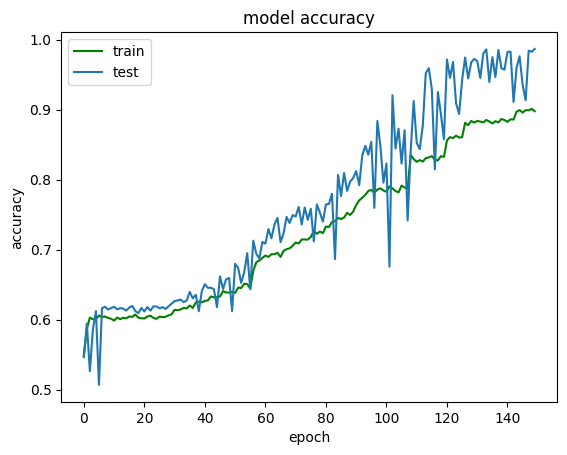

In [ ]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred_prob = model.predict(y_train)
y_pred = (y_pred_prob > 0.5).astype("int32")

auc_val = roc_auc_score(y_test, y_pred_prob)
precision_val = precision_score(y_test, y_pred)
recall_val = recall_score(y_test, y_pred)
f1_val = f1_score(y_test, y_pred)

print("ROC AUC:", auc_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC AUC: 0.9972804170960152
Precision: 0.9720850740600075
Recall: 0.9959143968871595
F1 Score: 0.9838554679992312
